In [1]:
# project: p6
# submitter: yeo9
# partner: none
# hours: 20

import geopandas as gpd
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.mask import mask

### Model 1

In [2]:
df = gpd.read_file("counties.geojson")
df

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."
...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070..."
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725..."
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553..."
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830..."


In [3]:
#Q1: How many counties are in Wisconsin?

len(df)

72

<AxesSubplot:>

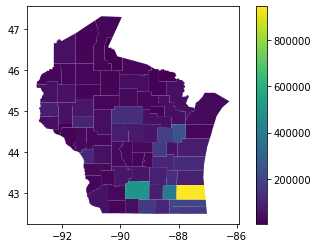

In [4]:
#Q2: What is the population of each county in WI?

df.plot(column = 'POP100', legend=True)

In [5]:
c = sqlite3.connect("counties_tracts.db")
df2 = pd.read_sql("SELECT AREALAND FROM counties", c)
new_df = df.join(df2)
new_df

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413
...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440


In [6]:
#Q3: What are the counties in the test dataset?

train, test = train_test_split(new_df, random_state=320)

county_list = []

for name in test['NAME']:
    county_list.append(name)
county_list

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [7]:
#Q4: How much variance in the POP100 can a LinearRegression model predict based only on AREALAND?

lr = LinearRegression()
lr.fit(train[['AREALAND']], train['POP100'])
lr.score(test[['AREALAND']], test['POP100'])

0.022002661530554857

In [8]:
#Q5: What is the expected population of a county with 500 square miles of area, according to the model?

slope = lr.coef_[0]
intercept = lr.intercept_

intercept + (500 * 2.59 * 1000000) * slope 

82032.53073541154

### Model 2

In [9]:
pd.read_sql("SELECT * FROM tracts", c)

,index,NAME,COUNTY,HU100
0,0,Census Tract 9701.01,085,2760
1,1,Census Tract 9710.01,085,1536
2,2,Census Tract 9706.01,085,1208
3,3,Census Tract 9706.02,085,3136
4,4,Census Tract 4301,131,2144
...,...,...,...,...
1404,1404,Census Tract 14,059,2913
1405,1405,Census Tract 15,059,1550
1406,1406,Census Tract 16,059,1286
1407,1407,Census Tract 17,059,1068


In [10]:
counties = pd.read_sql("SELECT * FROM counties", c)
counties

,index,NAME,COUNTY,AREALAND,AREAWATER
0,0,Racine County,101,861533739,1190103013
1,1,Clark County,019,3133378070,23239614
2,2,Wood County,141,2054044751,41994799
3,3,Rusk County,107,2366092584,44813690
4,4,Ozaukee County,089,603514413,2287415379
...,...,...,...,...,...
67,67,Washburn County,129,2064515991,145563849
68,68,Monroe County,081,2333270295,18986835
69,69,Richland County,103,1518120276,8153423
70,70,Price County,099,3248866440,62102368


In [11]:
df2 = pd.read_sql("""
  SELECT * FROM 
  tracts INNER JOIN counties """,
  c)

df2

,index,NAME,COUNTY,HU100,index,NAME,COUNTY,AREALAND,AREAWATER
0,0,Census Tract 9701.01,085,2760,0,Racine County,101,861533739,1190103013
1,0,Census Tract 9701.01,085,2760,1,Clark County,019,3133378070,23239614
2,0,Census Tract 9701.01,085,2760,2,Wood County,141,2054044751,41994799
3,0,Census Tract 9701.01,085,2760,3,Rusk County,107,2366092584,44813690
4,0,Census Tract 9701.01,085,2760,4,Ozaukee County,089,603514413,2287415379
...,...,...,...,...,...,...,...,...,...
101443,1408,Census Tract 18,059,927,67,Washburn County,129,2064515991,145563849
101444,1408,Census Tract 18,059,927,68,Monroe County,081,2333270295,18986835
101445,1408,Census Tract 18,059,927,69,Richland County,103,1518120276,8153423
101446,1408,Census Tract 18,059,927,70,Price County,099,3248866440,62102368


In [12]:
final_1 = counties.join(pd.read_sql("""SELECT COUNTY, SUM(HU100) AS HU100 FROM tracts GROUP BY COUNTY""", c).set_index("COUNTY"), on = 'COUNTY')

In [13]:
#Q6: What are the HU100 values for the counties in the train dataset?

final = df.join(final_1['HU100'])
train, test = train_test_split(final, random_state=320)
answer_dic = {}


for n in train.index:
    answer_dic[train['NAME'][n]] = train['HU100'][n]
    
answer_dic

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [14]:
#Q7: How much variance in the POP100 can a LinearRegression model predict based only on HU100?

lr = LinearRegression()
lr.fit(train[['HU100']], train['POP100'])



cross_val_score(lr, train[['HU100']], train['POP100'], cv=5).mean()

0.9652534544116037

In [15]:
#Q8: What is the standard deviation of the scores averaged in the previous question?

scores = cross_val_score(lr, train[['HU100']], train['POP100'], cv=5)

scores.std()

0.03704265206670459

In [16]:
#Q9: What is the formula relating POP100 and HU100?


# lr.intercept_
# lr.coef_

'POP100 = 2.39*HU100 + -7910.46'

'POP100 = 2.39*HU100 + -7910.46'

Text(216022, 488073, 'Dane')

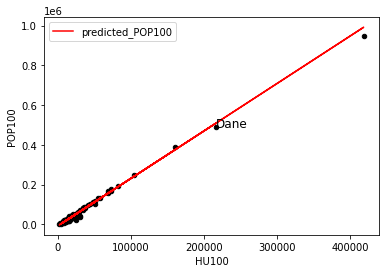

In [17]:
#Q10: what is the relationship between HU100 and POP100, visually?
answer_dic2 = {}
for n in final.index:
    answer_dic2[final['NAME'][n]] = final['POP100'][n]

final['predicted_POP100'] = 2.39 * final['HU100'] - 7910.46

ax = final.plot.line(x = 'HU100', y = 'predicted_POP100', color = "red")
final.plot.scatter(ax = ax, x = 'HU100', y = 'POP100', color = "black").text(answer_dic['Dane County'],answer_dic2['Dane County'], "Dane", fontsize=12)#plt.plot(x, m*x + b)

### Model 3

In [18]:
#Q11: How many numbers in the matrix A is between 2 and 5 (inclusive)?

A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

((A >= 2) & (A <= 5)).sum()

12

In [19]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

In [20]:
land = rasterio.open("zip://../p6/land.zip!wi.tif")
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Milwaukee+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
mil = gpd.read_file(url)
from rasterio.mask import mask
matrix, _ = mask(land, mil.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

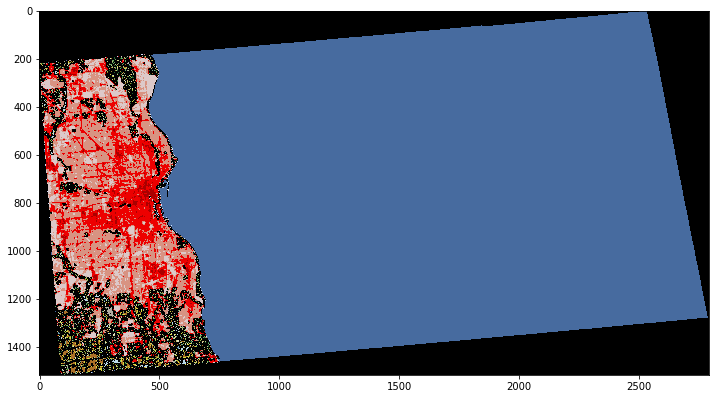

In [21]:
#Q12: How does Milwaukee County Look?

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [22]:
#Q13: What portion of Milwaukee County is "Open Water"?

(matrix == 11).astype(int).sum() / (matrix != 0).astype(int).sum()

0.7963037455950543

In [23]:
d_o = []
for i in df.index:
    info = df.loc[[i]]
    matrix, _ = mask(land, info.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    d_o.append((matrix == 21).astype(int).sum())

In [24]:
d_l = []

for i in df.index:
    info = df.loc[[i]]
    matrix, _ = mask(land, info.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    d_l.append((matrix == 22).astype(int).sum())


In [25]:
d_m = []

for i in df.index:
    info = df.loc[[i]]
    matrix, _ = mask(land, info.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    d_m.append((matrix == 23).astype(int).sum())


In [26]:
d_h = []


for i in df.index:
    info = df.loc[[i]]
    matrix, _ = mask(land, info.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    d_h.append((matrix == 24).astype(int).sum())


In [27]:
info_dic = {}

info_dic['developed_open'] = d_o
info_dic['developed_low'] = d_l
info_dic['developed_med'] = d_m
info_dic['developed_high'] = d_h
info_dic['POP100'] = list(df.POP100)
land_df = pd.DataFrame(data = info_dic, index = df.NAME, columns = info_dic.keys(), dtype=None, copy=None)

In [28]:
land_df

,developed_open,developed_low,developed_med,developed_high,POP100
NAME,,,,,
Racine County,54221,83597,59855,23884,195408
Clark County,120056,30699,9656,1919,34690
Wood County,91622,61463,21553,8515,74749
Rusk County,63109,24302,4638,1344,14755
Ozaukee County,51067,63252,28051,7237,86395
...,...,...,...,...,...
Washburn County,72527,28146,8638,1753,15911
Monroe County,96714,53564,19121,4214,44673
Richland County,54895,30584,4521,1091,18021


In [29]:
#Q14: What are the First 3 Columns of train, represented as nested dictionaries?

train, test = train_test_split(land_df, random_state=320)

train.iloc[:3].to_dict()

{'developed_open': {'Walworth County': 91733,
  'Marquette County': 43703,
  'Racine County': 54221},
 'developed_low': {'Walworth County': 86417,
  'Marquette County': 27193,
  'Racine County': 83597},
 'developed_med': {'Walworth County': 25760,
  'Marquette County': 4541,
  'Racine County': 59855},
 'developed_high': {'Walworth County': 8235,
  'Marquette County': 665,
  'Racine County': 23884},
 'POP100': {'Walworth County': 102228,
  'Marquette County': 15404,
  'Racine County': 195408}}

<AxesSubplot:xlabel='developed_open', ylabel='POP100'>

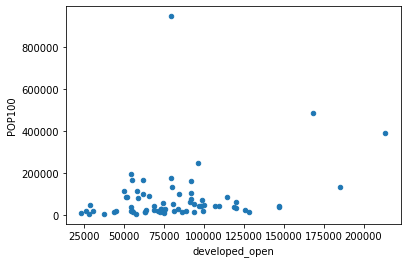

In [30]:
#Q15: What is the Relationship Between POP100 and ________________?

land_df.plot.scatter(x = 'developed_open', y = 'POP100')

In [31]:
#Individual Part (25%)

In [32]:
xcols = ['developed_open', 'developed_low', 'developed_med', 'developed_high']

In [33]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression()),
])



l_m_scores = cross_val_score(pipe['lr'], train[xcols], train["POP100"], cv=5)
poly_scores = cross_val_score(pipe, train[xcols], train["POP100"], cv=5)

In [34]:
#Q16: How do the models compare in terms of average cross validation score on the training data (5 folds)?

(l_m_scores.mean(), poly_scores.mean())

(0.9181286409212671, 0.6490702789460191)

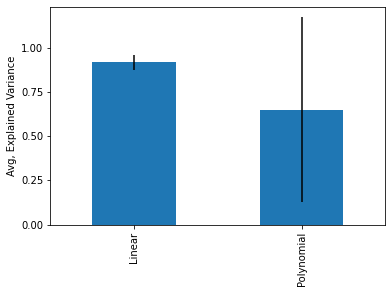

In [35]:
#Q17: How consistent are the scores of each model across different folds?

scores_df = pd.DataFrame()

scores_df.at["Linear", "score"] = l_m_scores.mean()
scores_df.at["Linear", "std_dev"] = l_m_scores.std()
scores_df.at["Polynomial", "score"] = poly_scores.mean()
scores_df.at["Polynomial", "std_dev"] = poly_scores.std()

ax = scores_df['score'].plot.bar(yerr=scores_df["std_dev"])
ax.set_ylabel("Avg, Explained Variance")
ax.set_yticks([0.00, 0.25, 0.5, 0.75, 1])

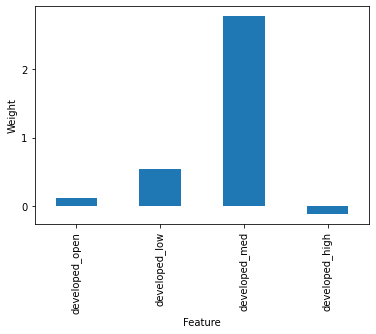

In [36]:
#Q18: what are the coefficients of the linear model?

fit1 = pipe['lr'].fit(train[xcols], train['POP100'])
coef = pipe['lr'].coef_

ax = pd.Series(coef, index = xcols).plot.bar()
ax.set_xlabel("Feature")
ax.set_ylabel("Weight")
ax.set_yticks([0,1,2])

In [37]:
#Q19: what are the coefficients of the polynomial model?

fit2 = pipe.fit(train[xcols],train['POP100'])

coeff = pipe['lr'].coef_
features = pipe['poly'].get_feature_names_out()

ans_dic = {}

for i in range(len(features)):
    ans_dic[features[i]] = coeff[i]
    
ans_dic

{'developed_open': -0.10421547981954869,
 'developed_low': 1.2925525095848176,
 'developed_med': -4.959212819522501,
 'developed_high': 13.195644532447844,
 'developed_open^2': 1.8580256379019389e-06,
 'developed_open developed_low': -1.9531480201062656e-05,
 'developed_open developed_med': 8.182470913425943e-05,
 'developed_open developed_high': -0.00010695600475867095,
 'developed_low^2': 3.5293004807535056e-05,
 'developed_low developed_med': -0.0002326425087280648,
 'developed_low developed_high': 0.00025876108520569985,
 'developed_med^2': 0.0005602988332727987,
 'developed_med developed_high': -0.0017321013682364689,
 'developed_high^2': 0.001572181162921871}

In [38]:
#Q20: Choose the better of your two models -- how much variance can it explain in your test dataset?

fit1 = pipe['lr'].fit(train[xcols], train['POP100'])
fit1.score(test[xcols], test['POP100'])

0.8659776114700685